# CSE4212: Artificail Intelligence Lab

Name: Md. Ahanaf Arif Khan

ID: 1910676110

Session: 2018-19

**Date:** 26 February, 2024

# Importing Dependencies

Filter Tensorflow log messages

In [22]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

Necessary Dependencies

In [23]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt

# Generating Training Samples

Create the dataset (data and labels)

In [24]:
def f(x):
    return 5 * x**3 - 8* x**2 - 7 * x + 1

In [25]:
xlim0 = -20
xlim1 = 20

# Generate the data
data_x = np.linspace(xlim0, xlim1, 161)
data_y = f(data_x)

# Used for plotting later on
ylim0 = np.min(data_y)
ylim1 = np.max(data_y)

Plot the dataset samples

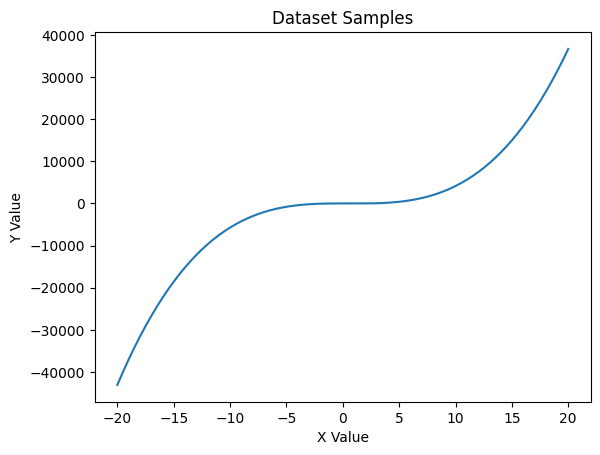

In [26]:
plt.plot(data_x, f(data_x))
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.title('Dataset Samples');

# Normalize the data to a range of (-1, 1)

In [27]:
print(f'X values: min={np.min(data_x)}, max={np.max(data_x)}')
print(f'Y values: min={np.min(data_y)}, max={np.max(data_y)}')

X values: min=-20.0, max=20.0
Y values: min=-43059.0, max=36661.0


In order to normalize the X values to a range of (-1, 1), we simply divide X by 20. 

However, for Y values, we first calculate the min and max values. The data was normalized to (-1, 1) with the help of these values inside the `normalize_y` function.

We also created a function `decode_y` for getting the original Y values back from the normalized data.

In [28]:
ymn = np.min(data_y)
ymx = np.max(data_y)

def normalize_y(data_y):
    return 2 * ((data_y-ymn)/(ymx-ymn)) - 1

def decode_y(y):
    return (y + 1) / 2 * (ymx-ymn)  + ymn 

data_y_norm = normalize_y(data_y)
data_x_norm = data_x / 20

After Normalization:

In [29]:
print(f'X values: min={np.min(data_x_norm)}, max={np.max(data_x_norm)}')
print(f'Y values: min={np.min(data_y_norm)}, max={np.max(data_y_norm)}')

X values: min=-1.0, max=1.0
Y values: min=-1.0, max=1.0


Plot the normalized dataset

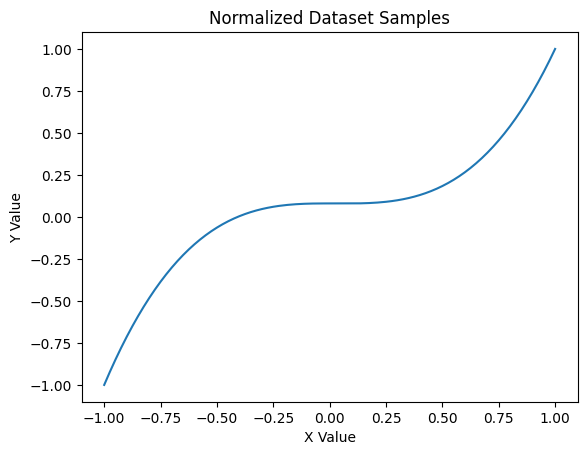

In [30]:
plt.plot(data_x_norm, data_y_norm)
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.title('Normalized Dataset Samples');

# Splitting the data into training, validation and testing sets

First, shuffle the dataset

In [31]:
total_count = data_x_norm.shape[0]

idxs = np.random.permutation(total_count)
data_x_norm = data_x_norm[idxs]
data_y_norm = data_y_norm[idxs]

Define the percentage amount of data in the validation and test dataset with `val_split` and `test_split`

In [32]:
val_split = 0.05
test_split = 0.05


train_count = int((1 - (val_split + test_split)) * total_count)
val_count = int(val_split * total_count)
test_count = int(test_split * total_count)


train_x, train_y = data_x_norm[: train_count], data_y_norm[: train_count]
val_x, val_y = data_x_norm[train_count : train_count + val_count], data_y_norm[train_count : train_count + val_count]
test_x, test_y = data_x_norm[train_count + val_count : ], data_y_norm[train_count + val_count : ]

In [33]:
print(f'Total Training Samples: {train_x.shape[0]}')
print(f'Total Validation Samples: {val_x.shape[0]}')
print(f'Total Testing Samples: {test_x.shape[0]}')

Total Training Samples: 144
Total Validation Samples: 8
Total Testing Samples: 9


# Creating the model

In [34]:
inputs = keras.Input(shape=(1,))
x = keras.layers.Dense(32, activation='relu')(inputs)
x = keras.layers.Dense(64, activation='relu')(x)
x = keras.layers.Dense(128, activation='relu')(x)
outputs = keras.layers.Dense(1)(x)

model = keras.Model(inputs, outputs)

### Displaying the model

In [35]:
# Summary
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_4 (Dense)             (None, 32)                64        
                                                                 
 dense_5 (Dense)             (None, 64)                2112      
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 10625 (41.50 KB)
Trainable params: 10625 (41.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


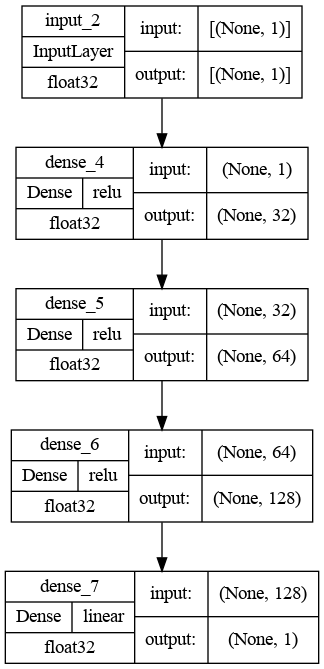

In [36]:
# Plot model
keras.utils.plot_model(model, show_dtype=True, show_shapes=True, show_layer_activations=True)

# Compiling and Training the model

In [37]:
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(x=train_x, y=train_y, batch_size=4,
            epochs=35, validation_data=(val_x, val_y),
            shuffle=True)

Epoch 1/35


36/36 [==============================] - 1s 4ms/step - loss: 0.0866 - val_loss: 0.0649
Epoch 2/35
36/36 [==============================] - 0s 2ms/step - loss: 0.0295 - val_loss: 0.0238
Epoch 3/35
36/36 [==============================] - 0s 2ms/step - loss: 0.0161 - val_loss: 0.0140
Epoch 4/35
36/36 [==============================] - 0s 1ms/step - loss: 0.0104 - val_loss: 0.0108
Epoch 5/35
36/36 [==============================] - 0s 3ms/step - loss: 0.0083 - val_loss: 0.0056
Epoch 6/35
36/36 [==============================] - 0s 2ms/step - loss: 0.0057 - val_loss: 0.0059
Epoch 7/35
36/36 [==============================] - 0s 3ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 8/35
36/36 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0025
Epoch 9/35
36/36 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0034
Epoch 10/35
36/36 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 11/35
36/36 [===========

# Plotting Training Errors

In [38]:
history = history.history

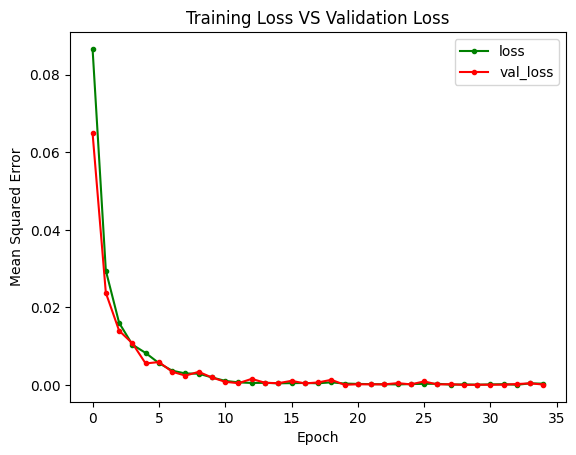

In [39]:
plt.plot(history['loss'], '.-', color='green')
plt.plot(history['val_loss'], '.-', color='red')
plt.legend(['loss', 'val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Training Loss VS Validation Loss');

# Predicting the Test set

In [40]:
preds = model.predict(test_x)

1/1 [==============================] - 0s 37ms/step


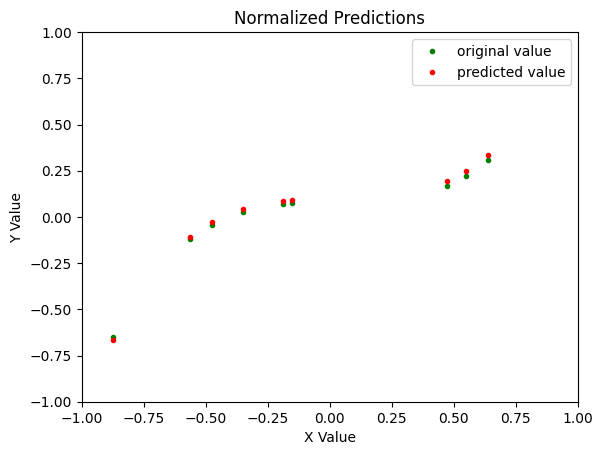

In [41]:
plt.plot(test_x, test_y, '.', color='green')
plt.plot(test_x, preds, '.', color='red')
plt.legend(['original value', 'predicted value'])
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.xlim([-1, +1])
plt.ylim([-1, 1])
plt.title('Normalized Predictions');

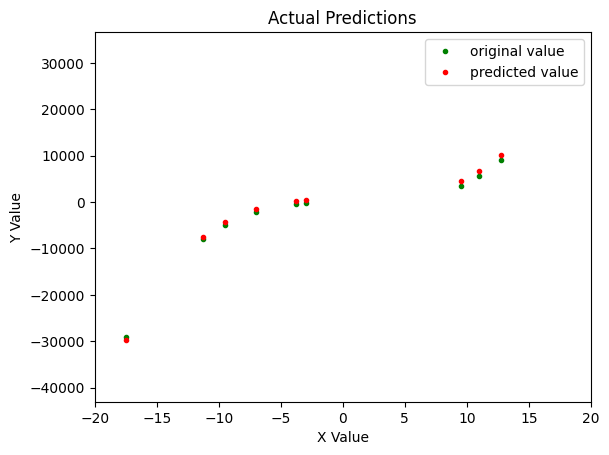

In [42]:
decoded_preds = decode_y(preds)

plt.plot(test_x * xlim1, decode_y(test_y), '.', color='green')
plt.plot(test_x * xlim1, decoded_preds, '.', color='red')
plt.legend(['original value', 'predicted value'])
plt.title('Actual Predictions')
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.ylim([ylim0, ylim1])
plt.xlim([-1 * xlim1, +1 * xlim1]);